<a href="https://colab.research.google.com/github/Gail529/Taylor/blob/main/basic_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# General Info about the dataset


In [ ]:
data=pd.read_csv('/content/games.csv')

In [ ]:
data.tail(20)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [ ]:
#Number of unique values for some of the categorical variables
categ_cols=['white_id','black_id','opening_eco','opening_ply'] 


In [ ]:
data['black_id'].nunique()

9331

In [ ]:
data['white_id'].nunique()

9438

In [ ]:
data['opening_eco'].nunique()

365

In [ ]:
x=data['turns'] >= 300

0        False
1        False
2        False
3        False
4        False
         ...  
20053    False
20054    False
20055    False
20056    False
20057    False
Name: turns, Length: 20058, dtype: bool

In [ ]:
data['increment_code'].value_counts()

In [ ]:
data.dtypes

id                 object
rated                bool
created_at        float64
last_move_at      float64
turns               int64
victory_status     object
winner             object
increment_code     object
white_id           object
white_rating        int64
black_id           object
black_rating        int64
moves              object
opening_eco        object
opening_name       object
opening_ply         int64
dtype: object

In [ ]:
data.describe()


,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


In [ ]:
data['turns'] = data['turns'].astype(float) 


## Graphical univariate and multivariate analysis

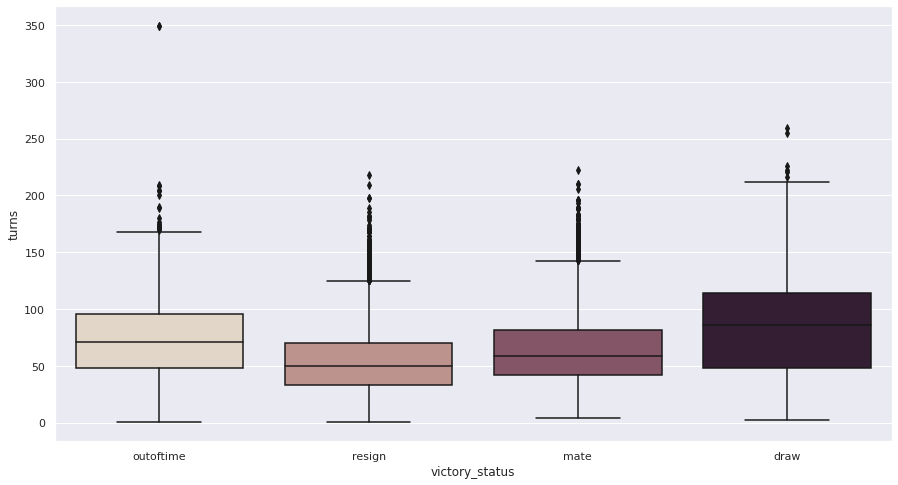

In [ ]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(15,8))
ax =sns.boxplot(x=data['victory_status'],y=data['turns'],palette="ch:.25")

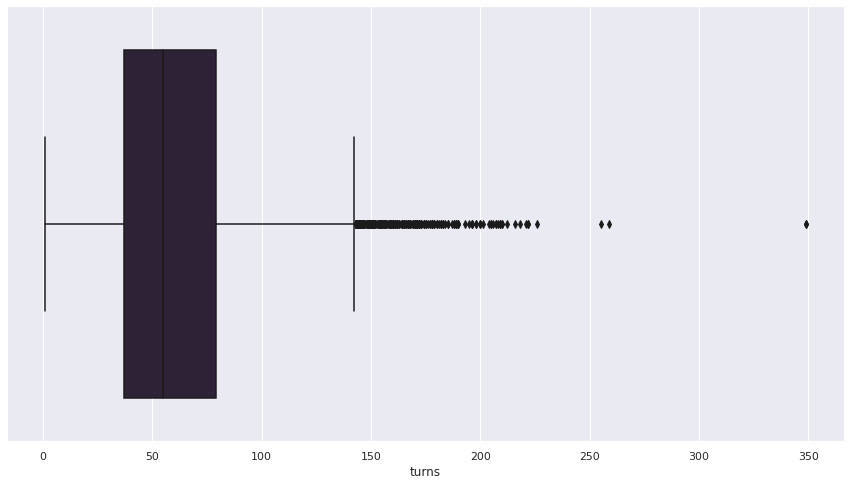

In [ ]:
sns.set_theme(style='darkgrid',palette='mako')
plt.figure(figsize=(15,8))
ax =sns.boxplot(x=data['turns'])

In [ ]:
x=data.loc[data['turns']<=200]
y=data.loc[data['turns']>=200]

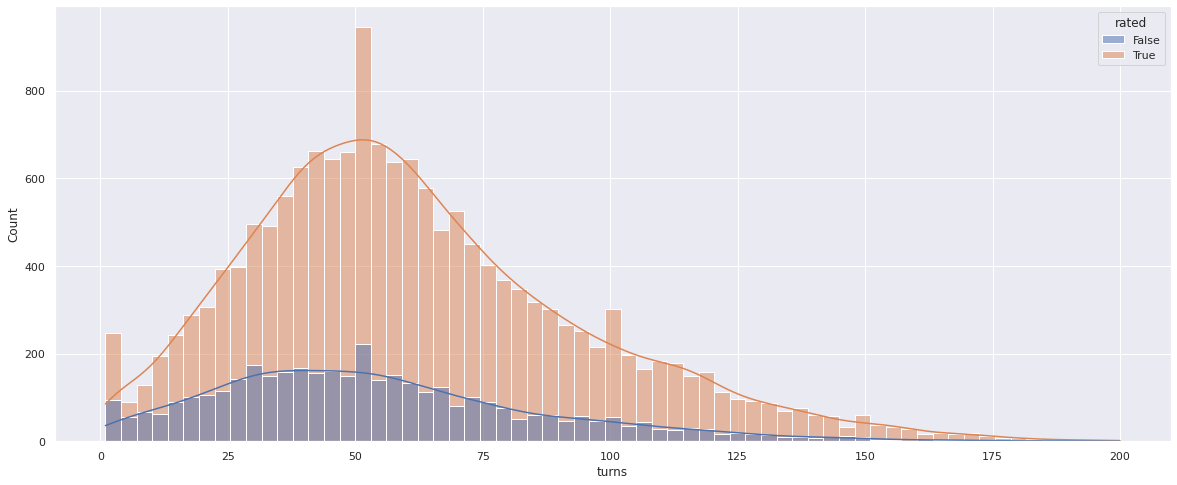

In [ ]:
data['turns']=data['turns'].astype(float)
plt.figure(figsize=(20,8))
sns.set_theme(style='darkgrid')
ax =  sns.histplot(x,x="turns",kde=True,hue='rated')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


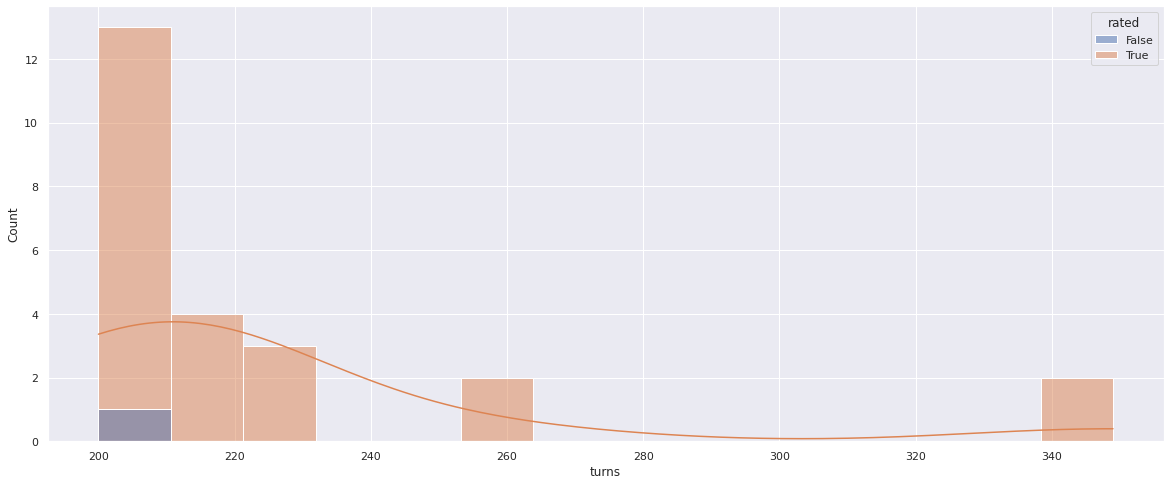

In [ ]:
data['turns']=data['turns'].astype(float)
plt.figure(figsize=(20,8))
sns.set_theme(style='darkgrid')
ax =  sns.histplot(y,x="turns",kde=True,hue='rated')

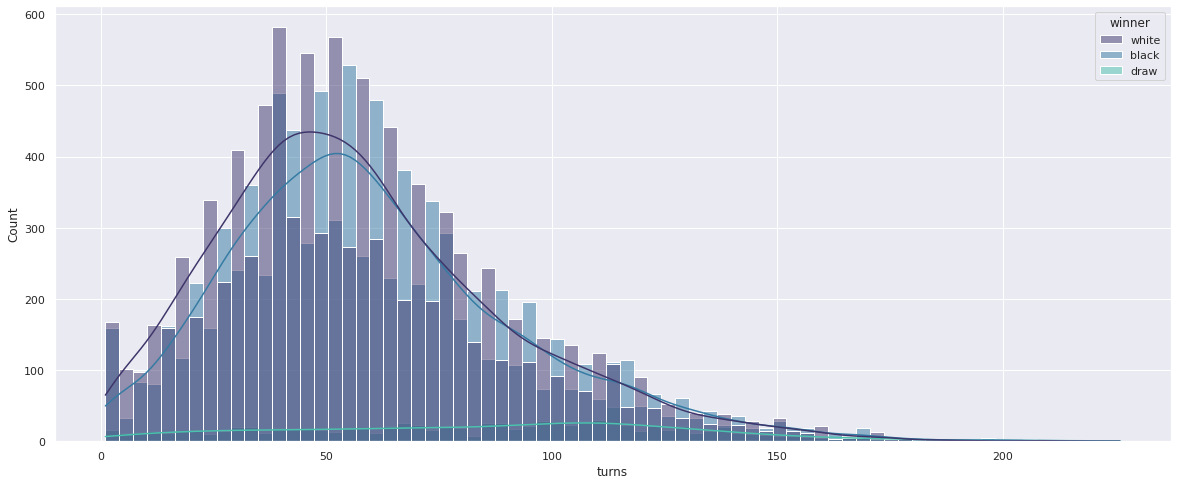

In [ ]:
data['turns']=data['turns'].astype(float)
x=data.loc[data['turns'] <= 250]
plt.figure(figsize=(20,8))
sns.set_theme(style='darkgrid')
ax =  sns.histplot(x,x="turns",hue='winner',kde=True,palette="mako")

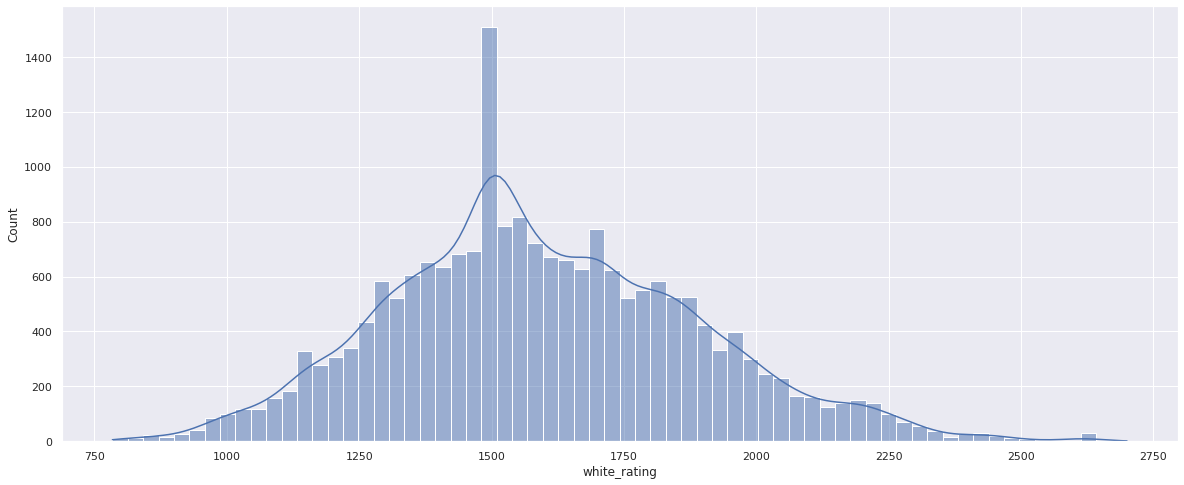

In [ ]:
data['turns']=data['turns'].astype(float)
plt.figure(figsize=(20,8))
sns.set_theme(style='darkgrid')
ax =  sns.histplot(data,x="white_rating",kde=True)

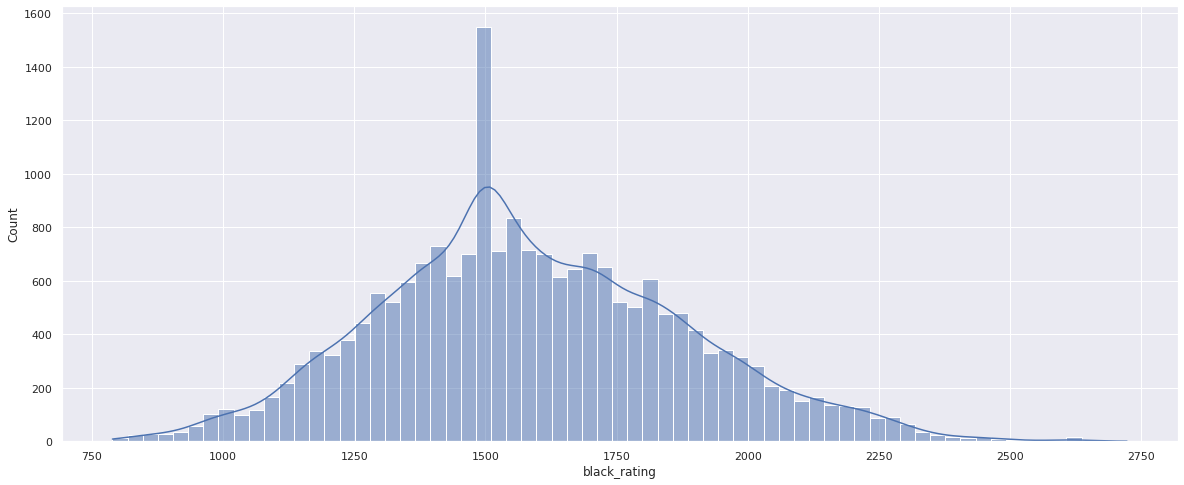

In [ ]:
plt.figure(figsize=(20,8))
sns.set_theme(style='darkgrid')
ax =  sns.histplot(data,x="black_rating",kde=True)

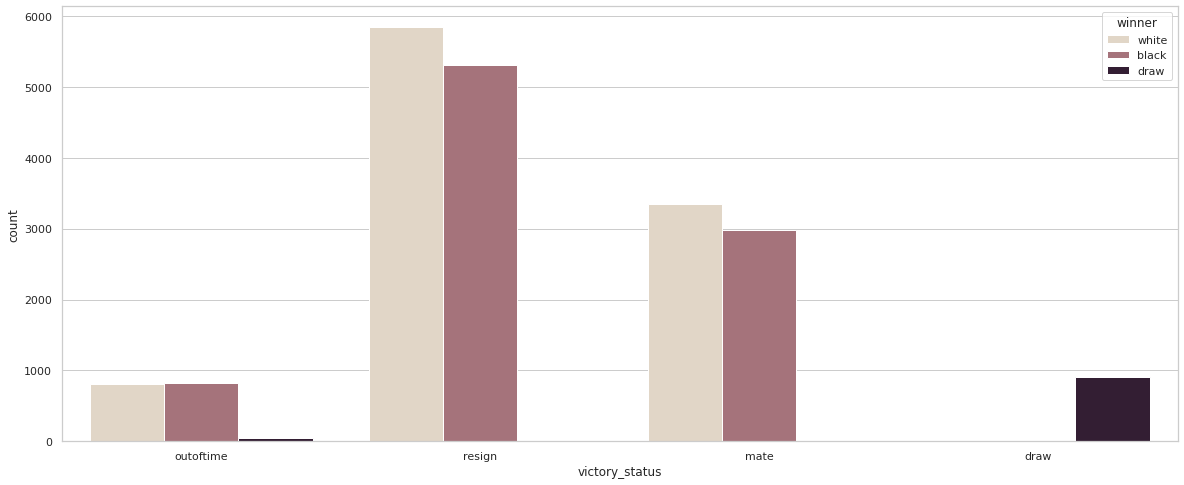

In [ ]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(20,8))
ax = sns.countplot(x="victory_status",data=data,hue="winner",palette="ch:.25")

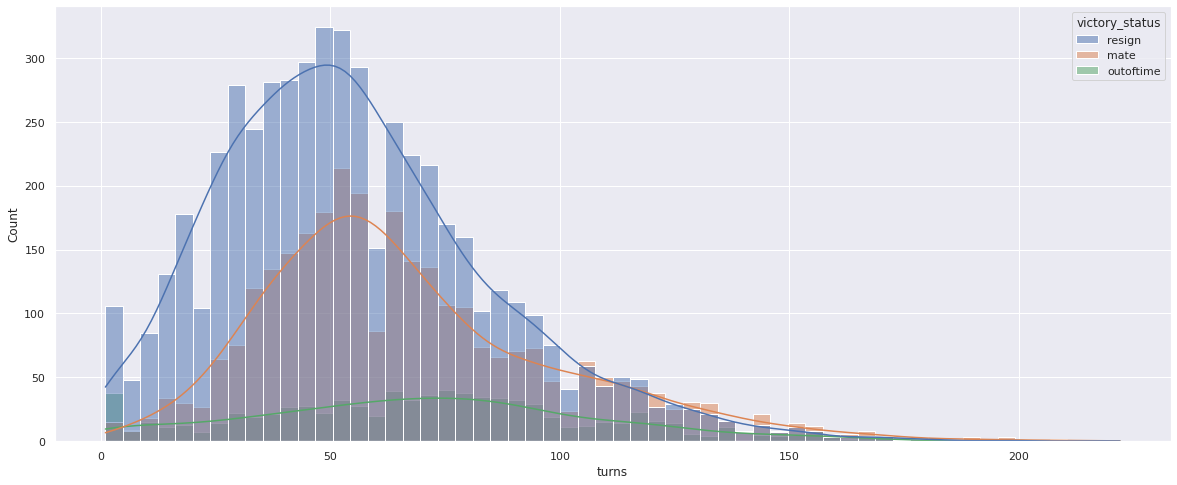

In [ ]:
x=data.loc[data['winner'] == 'black'] 
plt.figure(figsize=(20,8))
sns.set_theme(style='darkgrid')
ax =  sns.histplot(x,x="turns",kde=True,hue='victory_status')

In [ ]:
y=data.loc[data['winner'] == 'white'] 
plt.figure(figsize=(20,8))
sns.set_theme(style='darkgrid')
ax =  sns.lineplot(y,x="turns",kde=True,hue='victory_status')

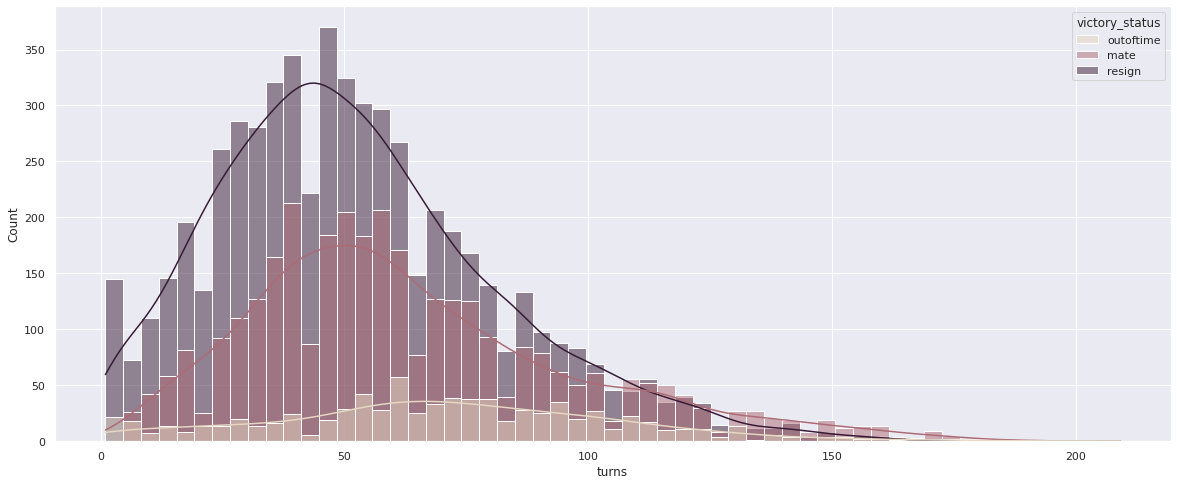

In [ ]:
x=data.loc[data['turns'] <= 250]
y=x.loc[x['winner'] == 'white'] 
plt.figure(figsize=(20,8))
sns.set_theme(style='darkgrid')
ax =  sns.histplot(y,x="turns",kde=True,hue='victory_status',palette="ch:.25")

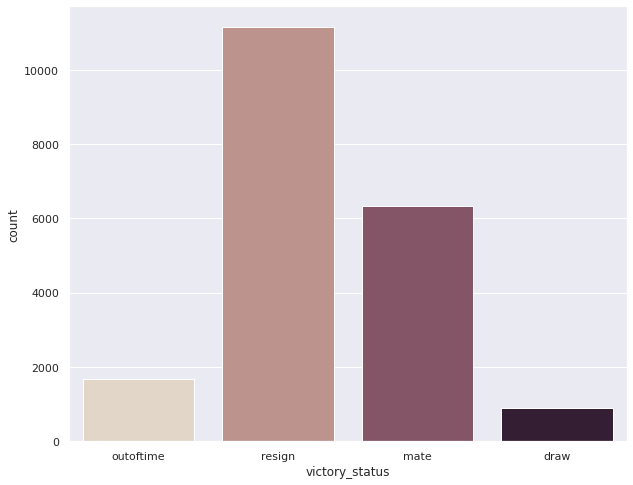

In [ ]:
#x=data.loc[data['winner'] == 'black'] 
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10,8))
ax = sns.countplot(x="victory_status",data=data,palette="ch:.25")

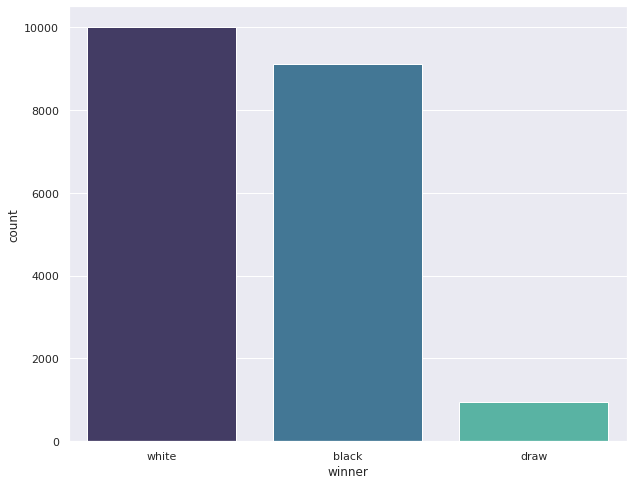

In [ ]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10,8))
ax = sns.countplot(x="winner",data=data,palette="mako")

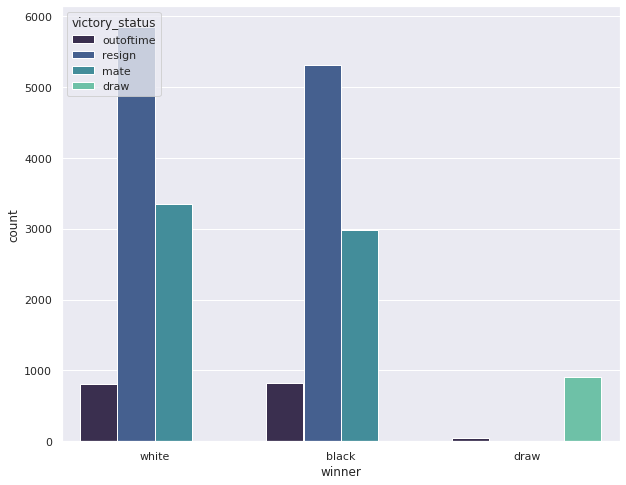

In [ ]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10,8))
ax = sns.countplot(x="winner",data=data,hue="victory_status",palette="mako")

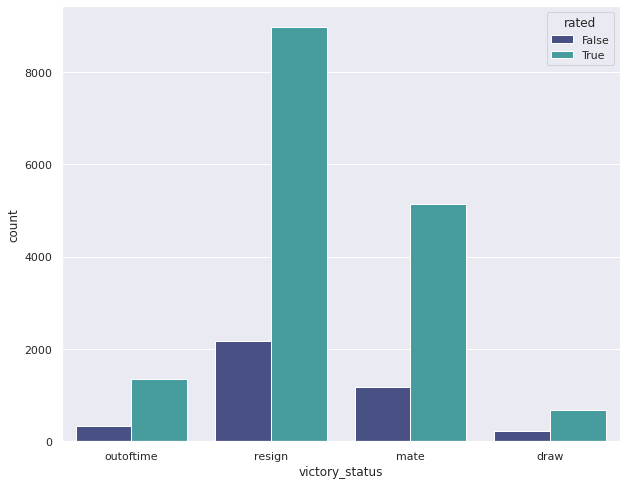

In [ ]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10,8))
ax = sns.countplot(x="victory_status",data=data,hue="rated",palette='mako')

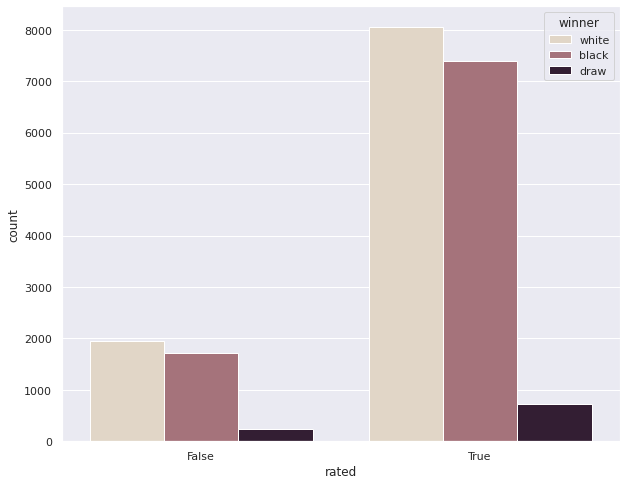

In [ ]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10,8))
ax = sns.countplot(x="rated",data=data,hue="winner",palette="ch:.25")